In [28]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stocks = pd.read_csv("./stocks3.csv")
stocks.head()

,Date,AAPL,MSFT,GOOGL,AMZN,TSLA
0,1/3/2023,NaN,239.580002,89.120003,85.820000,108.099998
1,1/4/2023,126.360001,NaN,NaN,85.139999,113.639999
2,1/5/2023,125.019997,222.309998,86.199997,83.120003,110.339996
3,1/6/2023,129.619995,224.929993,87.339996,86.080002,113.059998
4,1/9/2023,130.149994,227.119995,88.019997,87.360001,119.769997


In [3]:
stocks.describe()

,AAPL,MSFT,GOOGL,AMZN,TSLA
count,168.000000,168.000000,168.000000,169.000000,169.000000
mean,167.948214,297.445000,111.501012,112.877278,205.751775
std,18.020152,36.458339,14.303862,16.242632,44.877794
min,125.019997,222.309998,86.199997,83.120003,108.099998
25%,153.147499,264.355003,99.370003,98.699997,176.889999
50%,170.619995,307.130005,107.754997,106.620003,196.880005
75%,182.320004,328.790008,123.669998,128.910004,249.830002
max,196.449997,359.489990,136.169998,142.220001,293.339996


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    169 non-null    object 
 1   AAPL    168 non-null    float64
 2   MSFT    168 non-null    float64
 3   GOOGL   168 non-null    float64
 4   AMZN    169 non-null    float64
 5   TSLA    169 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.1+ KB


In [5]:
stocks.shape

(169, 6)

In [6]:
stocks["TSLA"].mode()

0    256.899994
1    258.079987
Name: TSLA, dtype: float64

In [7]:
stocks.isnull().sum()

Date     0
AAPL     1
MSFT     1
GOOGL    1
AMZN     0
TSLA     0
dtype: int64

In [8]:
print("stocks_NonDuplicate")
stocks_nonDuplicate = stocks.drop_duplicates(subset=["Date"])
stocks_nonDuplicate.info()
print(stocks_nonDuplicate.describe())

print("\nstocks:")
stocks.drop_duplicates(inplace= True)
stocks.info()
print(stocks.describe())


stocks_NonDuplicate
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    167 non-null    object 
 1   AAPL    166 non-null    float64
 2   MSFT    166 non-null    float64
 3   GOOGL   166 non-null    float64
 4   AMZN    167 non-null    float64
 5   TSLA    167 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.1+ KB
             AAPL        MSFT       GOOGL        AMZN        TSLA
count  166.000000  166.000000  166.000000  167.000000  167.000000
mean   167.709518  297.073554  111.205542  112.593893  205.132155
std     17.995745   36.519296   14.131609   16.129128   44.784374
min    125.019997  222.309998   86.199997   83.120003  108.099998
25%    153.042503  263.864998   99.370003   98.469997  175.684998
50%    169.634995  306.279999  107.689999  106.209999  196.809998
75%    181.079998  328.742508  123.612499  128.790001  247.519997
max  

In [9]:
print("stocks_NonDuplicate")
stocks_nonDuplicate.fillna(stocks_nonDuplicate.drop(columns=["Date"]).mean(), inplace=True)
stocks_nonDuplicate.info()
print(stocks_nonDuplicate.describe())

print("\nstocks:")
stocks.dropna(inplace= True)
stocks.info()
print(stocks.describe())

stocks_NonDuplicate
<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    167 non-null    object 
 1   AAPL    167 non-null    float64
 2   MSFT    167 non-null    float64
 3   GOOGL   167 non-null    float64
 4   AMZN    167 non-null    float64
 5   TSLA    167 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.1+ KB
             AAPL        MSFT       GOOGL        AMZN        TSLA
count  167.000000  167.000000  167.000000  167.000000  167.000000
mean   167.709518  297.073554  111.205542  112.593893  205.132155
std     17.941459   36.409132   14.088980   16.129128   44.784374
min    125.019997  222.309998   86.199997   83.120003  108.099998
25%    153.095001  264.110001   99.370003   98.469997  175.684998
50%    169.589996  305.559998  107.739998  106.209999  196.809998
75%    181.040001  328.695007  123.584999  128.790001  247.519997
max  

In [10]:
print("stocks_NonDuplicate")
print(stocks_nonDuplicate.describe())

print("\nstocks:")
stocks.describe()


stocks_NonDuplicate
             AAPL        MSFT       GOOGL        AMZN        TSLA
count  167.000000  167.000000  167.000000  167.000000  167.000000
mean   167.709518  297.073554  111.205542  112.593893  205.132155
std     17.941459   36.409132   14.088980   16.129128   44.784374
min    125.019997  222.309998   86.199997   83.120003  108.099998
25%    153.095001  264.110001   99.370003   98.469997  175.684998
50%    169.589996  305.559998  107.739998  106.209999  196.809998
75%    181.040001  328.695007  123.584999  128.790001  247.519997
max    196.449997  359.489990  136.169998  142.220001  293.339996

stocks:


,AAPL,MSFT,GOOGL,AMZN,TSLA
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,167.960121,297.422000,111.339394,112.922546,206.274727
std,17.757613,36.352625,14.068683,15.945088,43.821618
min,125.019997,222.309998,86.199997,83.120003,110.339996
25%,153.199997,264.600006,99.370003,98.709999,177.899994
50%,169.679993,307.000000,107.739998,106.620003,196.880005
75%,181.119995,328.790008,123.639999,128.800003,249.699997
max,196.449997,359.489990,136.169998,142.220001,293.339996


In [11]:
columnNames_nonDup = stocks_nonDuplicate.columns

print("Mode description of stocks_nonDuplicate: \n")
for column in columnNames_nonDup:
    if column != "Date":
        print(column, " mode: ")
        print(stocks_nonDuplicate[column].mode(), "\n")
        print(stocks_nonDuplicate[column].value_counts())

Mode description of stocks_nonDuplicate: 

AAPL  mode: 
0    163.759995
1    172.070007
Name: AAPL, dtype: float64 

AAPL
163.759995    2
172.070007    2
167.709518    1
185.009995    1
180.570007    1
             ..
158.929993    1
160.250000    1
158.279999    1
157.649994    1
187.869995    1
Name: count, Length: 165, dtype: int64
MSFT  mode: 
0    305.410004
Name: MSFT, dtype: float64 

MSFT
305.410004    2
335.940002    1
323.380005    1
325.260010    1
326.790008    1
             ..
280.570007    1
276.380005    1
275.230011    1
280.510010    1
327.760010    1
Name: count, Length: 166, dtype: int64
GOOGL  mode: 
0     96.940002
1     99.370003
2    105.410004
3    105.970001
4    123.669998
5    129.779999
Name: GOOGL, dtype: float64 

GOOGL
129.779999    2
123.669998    2
96.940002     2
99.370003     2
105.410004    2
             ..
102.459999    1
101.029999    1
101.389999    1
100.889999    1
136.169998    1
Name: count, Length: 161, dtype: int64
AMZN  mode: 
0    124.25

In [12]:
columnNames = stocks.columns

print("Mode description of stocks: \n")
for column in columnNames:
    if column != "Date":
        print(column, " mode: ")
        print(stocks[column].mode(), "\n")
        print(stocks[column].value_counts())

Mode description of stocks: 

AAPL  mode: 
0    163.759995
1    172.070007
Name: AAPL, dtype: float64 

AAPL
163.759995    2
172.070007    2
183.960007    1
180.570007    1
180.960007    1
             ..
158.279999    1
157.649994    1
160.770004    1
162.360001    1
187.869995    1
Name: count, Length: 163, dtype: int64
MSFT  mode: 
0    305.410004
Name: MSFT, dtype: float64 

MSFT
305.410004    2
222.309998    1
333.559998    1
325.260010    1
326.790008    1
             ..
276.380005    1
275.230011    1
280.510010    1
284.049988    1
327.760010    1
Name: count, Length: 164, dtype: int64
GOOGL  mode: 
0     96.940002
1     99.370003
2    105.410004
3    105.970001
4    123.669998
5    129.779999
Name: GOOGL, dtype: float64 

GOOGL
129.779999    2
123.669998    2
105.970001    2
96.940002     2
99.370003     2
             ..
101.029999    1
101.389999    1
100.889999    1
103.730003    1
136.169998    1
Name: count, Length: 159, dtype: int64
AMZN  mode: 
0    124.250000
1    134

In [13]:
#Coefficient of variance:
coefficientOfVariance = lambda x:  (np.std(x, ddof=0)/np.mean(x)) * 100



In [14]:
print("Coefficient of variation of stocks: \n")
print(stocks.iloc[:, 1:].apply(coefficientOfVariance))

Coefficient of variation of stocks: 

AAPL     10.540431
MSFT     12.185480
GOOGL    12.597505
AMZN     14.077522
TSLA     21.179824
dtype: float64


In [15]:
#cov
#corr
print("Covariance between columns of stocks_nonDuplicate:")
print(stocks_nonDuplicate.iloc[:, 1:].cov(), "\n")

print("Covariance between columns of stocks: ")
stocks.iloc[:, 1:].cov()

Covariance between columns of stocks_nonDuplicate:
             AAPL         MSFT       GOOGL        AMZN         TSLA
AAPL   321.895944   623.676415  219.884458  254.958242   671.414461
MSFT   623.676415  1325.624894  469.699583  524.921797  1279.183423
GOOGL  219.884458   469.699583  198.499345  214.471428   454.411966
AMZN   254.958242   524.921797  214.471428  260.148786   597.962692
TSLA   671.414461  1279.183423  454.411966  597.962692  2005.640142 

Covariance between columns of stocks: 


,AAPL,MSFT,GOOGL,AMZN,TSLA
AAPL,315.332816,631.194371,222.532227,251.062642,656.246337
MSFT,631.194371,1321.513357,467.638165,521.821931,1260.366063
GOOGL,222.532227,467.638165,197.927830,213.437089,446.732589
AMZN,251.062642,521.821931,213.437089,254.245846,573.720143
TSLA,656.246337,1260.366063,446.732589,573.720143,1920.334189


In [16]:
#corr
print("Correlation between columns of stocks_nonDuplicate:")
print(stocks_nonDuplicate.iloc[:, 1:].corr(method="pearson"), "\n")

print("Correlation between columns of stocks: ")
stocks.iloc[:, 1:].corr("pearson")

Correlation between columns of stocks_nonDuplicate:
           AAPL      MSFT     GOOGL      AMZN      TSLA
AAPL   1.000000  0.954753  0.869876  0.881050  0.835615
MSFT   0.954753  1.000000  0.915652  0.893868  0.784505
GOOGL  0.869876  0.915652  1.000000  0.943798  0.720184
AMZN   0.881050  0.893868  0.943798  1.000000  0.827821
TSLA   0.835615  0.784505  0.720184  0.827821  1.000000 

Correlation between columns of stocks: 


,AAPL,MSFT,GOOGL,AMZN,TSLA
AAPL,1.000000,0.977784,0.890748,0.886687,0.843323
MSFT,0.977784,1.000000,0.914367,0.900243,0.791175
GOOGL,0.890748,0.914367,1.000000,0.951458,0.724612
AMZN,0.886687,0.900243,0.951458,1.000000,0.821079
TSLA,0.843323,0.791175,0.724612,0.821079,1.000000


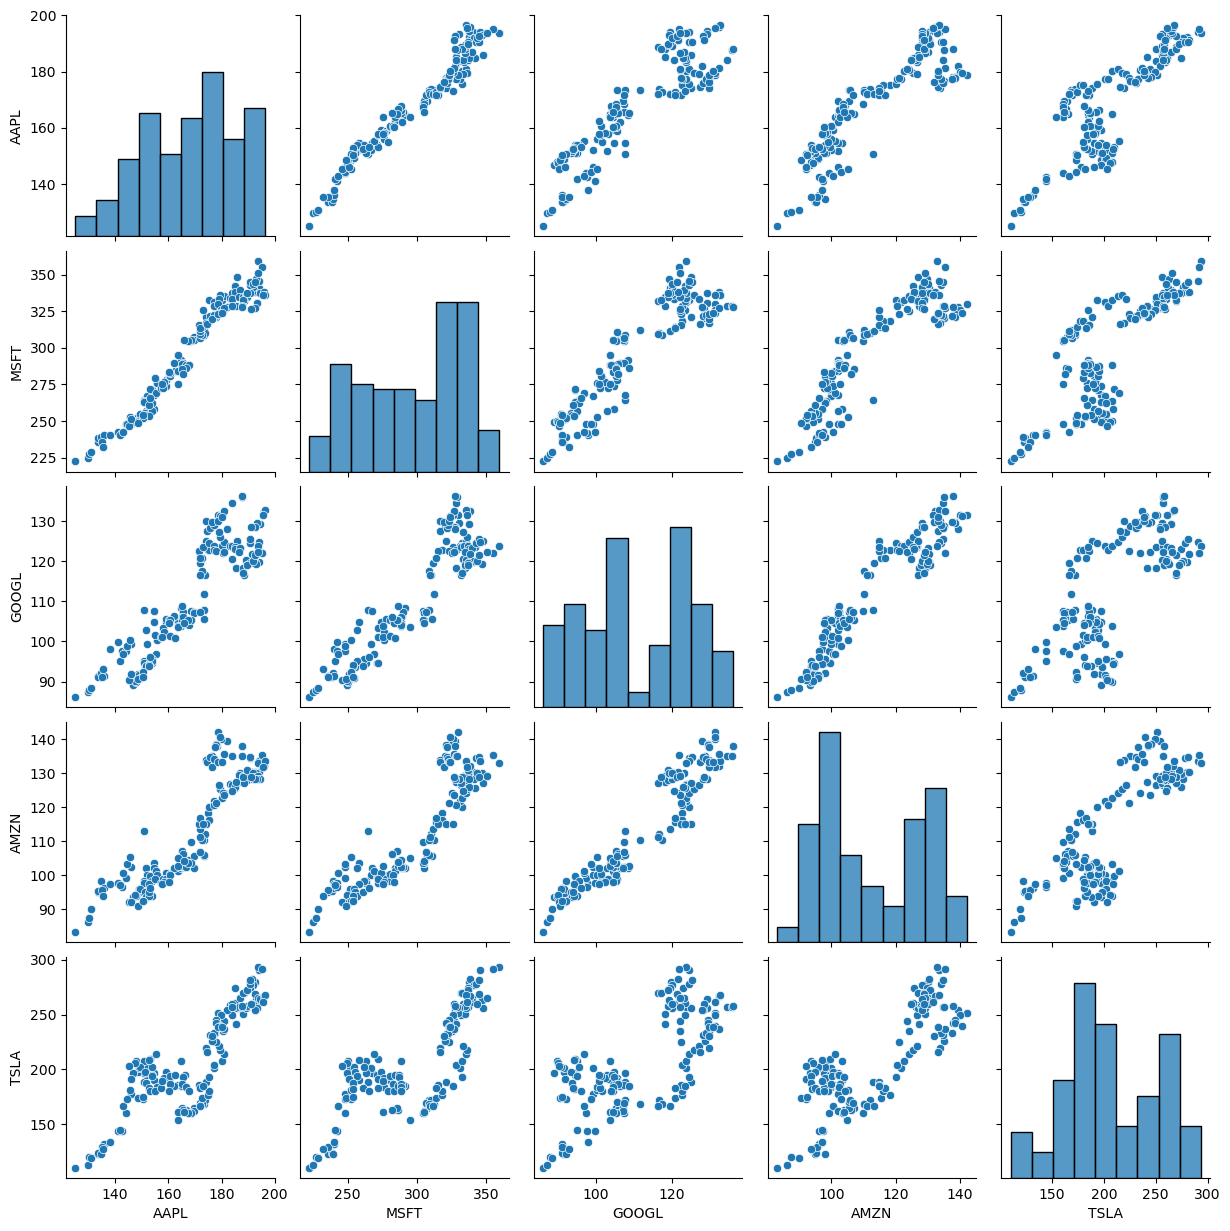

In [34]:
sns.pairplot(stocks)

<Axes: >

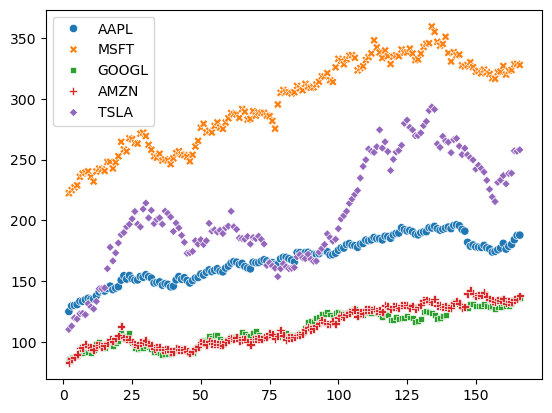

In [29]:
# plt.plot(stocks["AAPL"], st.norm.pdf(stocks["AAPL"], loc = 0, scale = 1))
sns.scatterplot(stocks)